# Model Fit

In [179]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, log_loss
import sklearn
import matplotlib.pyplot as plt
import os
from xgboost import XGBClassifier, XGBRegressor

In [180]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [181]:
panel = pd.read_csv('2004_notadd_new.csv')
print(panel)

       stkcd  year  province_code  city_code indcd   fixed_asset  staff  \
0          2  2000         440000   440300.0   K70  3.382824e+08   6616   
1          2  2001         440000   440300.0   K70  2.883114e+08   5349   
2          2  2002         440000   440300.0   K70  3.486585e+08   6055   
3          2  2003         440000   440300.0   K70  2.680249e+08   7025   
4          2  2004         440000   440300.0   K70  2.314256e+08   9627   
...      ...   ...            ...        ...   ...           ...    ...   
7991  900950  2006         320000   320400.0   K70  3.174713e+07    480   
7992  900951  2006         210000   210200.0   C26  2.012465e+08   2362   
7993  900953  2006         310000   310000.0   C36  8.829307e+08  10588   
7994  900956  2006         420000   420200.0   C38  2.770235e+08   2951   
7995  900957  2006         310000   310000.0   E50  2.040832e+08    104   

      tfp_acf01  lninvesta   lntasset  ...  tapr_win   roa_win  leverage  age  \
0     10.454041  1

# 2004

In [182]:
panel['tp_2004'] = panel['treat_2004'] * panel['post_2004']
# make post_2004 type bool
panel['post_2004'] = panel['post_2004'].astype(bool)

In [183]:
panel = panel.groupby(['stkcd', 'post_2004']).mean()
panel = panel.reset_index(level='post_2004')
panel = panel[panel.index.duplicated(keep = False)]
panel

/var/folders/jr/pbg7pbbx5xdc686t3j5c4rkw0000gn/T/ipykernel_8130/281888229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  panel = panel.groupby(['stkcd', 'post_2004']).mean()


,post_2004,year,province_code,city_code,fixed_asset,staff,tfp_acf01,lninvesta,lntasset,lntdebt,tapr_win,roa_win,leverage,age,lnclr,unempro,unemployee,second_pro,treat_2004,tp_2004
stkcd,,,,,,,,,,,,,,,,,,,,
2,False,2001.5,440000.000000,440300.000000,3.108193e+08,6261.250000,10.737190,17.621392,22.738050,22.101366,0.072003,0.054075,0.530625,13.5,10.811859,1.445000,19769.250000,55.200000,0.0,0.0
2,True,2005.0,440000.000000,440300.000000,3.183829e+08,11330.000000,11.309293,17.915282,23.961760,23.479464,0.080336,0.057173,0.617797,17.0,10.173468,1.496667,27032.666667,55.746666,0.0,0.0
6,False,2001.5,440000.000000,440300.000000,2.096603e+08,89.250000,12.323968,18.099833,22.136202,21.767839,0.006656,0.002003,0.692222,12.5,14.656501,1.445000,19769.250000,55.200000,0.0,0.0
6,True,2005.0,440000.000000,440300.000000,1.395461e+08,117.000000,12.063939,18.121087,21.856576,21.349926,0.048283,0.042255,0.607387,16.0,13.919624,1.496667,27032.666667,55.746666,0.0,0.0
7,False,2001.5,440000.000000,440300.000000,3.297029e+08,623.000000,8.823369,16.668979,20.798215,20.580685,-0.031266,-0.038605,0.805408,13.5,13.128630,1.445000,19769.250000,55.200000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600898,True,2005.0,383333.333333,383433.333333,1.883967e+08,1041.000000,11.048621,13.110449,20.718652,20.303584,0.038023,0.021854,0.661559,16.0,12.108973,0.966667,57792.000000,45.916667,0.0,0.0
600899,False,2001.5,330000.000000,330100.000000,4.206794e+07,216.750000,8.987749,12.673034,20.417642,19.814291,-0.133851,-0.130932,0.586198,5.5,12.269006,1.047500,66253.750000,51.100001,0.0,0.0
600899,True,2004.0,330000.000000,330100.000000,1.817237e+07,57.000000,7.760179,11.101553,18.932198,19.643116,-0.524325,-0.511600,2.035860,8.0,12.672364,1.120000,72677.000000,53.000000,0.0,0.0


In [184]:
# format this in a manner sympatico with ATT estimation
# compact_df contains only post_2004 data
compact_df = panel[panel['post_2004']]

# calcuate change in TFP
lninvesta = panel['lninvesta'].values
compact_df['Y1-Y0'] = lninvesta[panel['post_2004']] - lninvesta[~panel['post_2004']]

# reset index so we have (1,2,3..)
compact_df = compact_df.reset_index()

# set outcome to Y1-Y0
outcome = compact_df['Y1-Y0']
treatment = compact_df['treat_2004'].astype(int)
confounders = compact_df[['lntasset', 'lntdebt', 'roa_win','age', 'unempro', 'second_pro']]
#compact_df.to_csv("compact.csv")

/var/folders/jr/pbg7pbbx5xdc686t3j5c4rkw0000gn/T/ipykernel_8130/3099643869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_df['Y1-Y0'] = lninvesta[panel['post_2004']] - lninvesta[~panel['post_2004']]


In [185]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [186]:
# specify a model for the conditional expected outcome

# TODO(victorveitch) the covariates have basically no predictive power, replace this example with something better

# make a function that returns a sklearn model for later use in k-folding
def make_Q_model():
   return LinearRegression() #first model
   #return GradientBoostingRegressor(random_state=RANDOM_SEED, n_estimators=200, max_depth=3) # second model
   #return RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100, max_depth=3) # third model
   #return RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100, max_depth=5) # fourth model
Q_model = make_Q_model()

# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_w_treatment = confounders.copy()
X_w_treatment["treatment"] = treatment

X_train, X_test, y_train, y_test = train_test_split(X_w_treatment, outcome, test_size=0.3)
Q_model.fit(X_train, y_train)
y_pred = Q_model.predict(X_test)

test_mse=mean_squared_error(y_pred, y_test)
print(f"Test MSE of fit model {test_mse}") 
baseline_mse=mean_squared_error(y_train.mean()*np.ones_like(y_test), y_test)
print(f"Test MSE of no-covariate model {baseline_mse}")
   #return XGBRegressor(n_estimators=100, n_jobs=1, random_state= RANDOM_SEED) 

Test MSE of fit model 1.354796242995709
Test MSE of no-covariate model 1.832560746666037


In [187]:
# specify a model for the propensity score

def make_g_model():
 return LogisticRegression(max_iter=1000) # first model
 #return GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state = RANDOM_SEED) # second model
 #return RandomForestClassifier(n_estimators=100, max_depth=3, random_state=RANDOM_SEED) # third model
 #return RandomForestClassifier(n_estimators=100, max_depth=5, random_state=RANDOM_SEED) # fourth model


g_model = make_g_model()
# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_train, X_test, a_train, a_test = train_test_split(confounders, treatment, test_size=0.3)
g_model.fit(X_train, a_train)
a_pred = g_model.predict_proba(X_test)[:,1]

test_ce=log_loss(a_test, a_pred)
print(f"Test CE of fit model {test_ce}") 
baseline_ce=log_loss(a_test, a_train.mean()*np.ones_like(a_test))
print(f"Test CE of no-covariate model {baseline_ce}")

# return KNeighborsClassifier(n_neighbors=4)
# return  DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
# return XGBClassifier(n_estimators=200, n_jobs=1, nthread=None, random_state= RANDOM_SEED) 

Test CE of fit model 0.22302655791621157
Test CE of no-covariate model 0.2138855974607507


In [188]:
# Model fit 
X_w_treatment = confounders.copy()
X_w_treatment["treatment"] = treatment

Q_mses = []
mse_baselines = []
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
for train_index, test_index in kf.split(X_w_treatment, outcome):
    X_train, X_test = X_w_treatment.loc[train_index], X_w_treatment.loc[test_index]
    y_train, y_test = outcome.loc[train_index], outcome.loc[test_index]
    #Q_model = Q_model_class(**Q_model_params)
    Q_model.fit(X_train, y_train)
    y_pred = Q_model.predict(X_test)
    Q_mse = mean_squared_error(y_test, y_pred)
    baseline_mse = mean_squared_error(y_train.mean()*np.ones_like(y_test), y_test)
    Q_mses.append(Q_mse)
    mse_baselines.append(baseline_mse)

X = confounders.copy()
g_ces = []
ce_baselines = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
for train_index, test_index in kf.split(X, treatment):
    X_train, X_test= X.loc[train_index], X.loc[test_index]
    a_train, a_test = treatment.loc[train_index], treatment.loc[test_index]
    #g_model = g_model_class(**g_model_params)
    g_model.fit(X_train, a_train)
    a_pred = g_model.predict_proba(X_test)[:,1]
    g_ce = log_loss(a_test, a_pred)
    baseline_ce = log_loss(a_test, a_train.mean()*np.ones_like(a_test))
    g_ces.append(g_ce)
    ce_baselines.append(baseline_ce)

df = pd.DataFrame({'Q mse': Q_mses, 'Q baseline': mse_baselines, 'g ce': g_ces, 'g baselines': ce_baselines})
df2 = df.mean(axis=0)
df2

Q mse          1.391058
Q baseline     1.785223
g ce           0.189413
g baselines    0.191816
dtype: float64

In [189]:
def treatment_k_fold_fit_and_predict(make_model, X:pd.DataFrame, A:np.array, n_splits:int):
    """
    Implements K fold cross-fitting for the model predicting the treatment A. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns an array containing the predictions  

    Args:
    model: function that returns sklearn model (which implements fit and predict_prob)
    X: dataframe of variables to adjust for
    A: array of treatments
    n_splits: number of splits to use
    """
    predictions = np.full_like(A, np.nan, dtype=float)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    
    for train_index, test_index in kf.split(X, A):
      X_train = X.loc[train_index]
      A_train = A.loc[train_index]
      g = make_model()
      g.fit(X_train, A_train)

      # get predictions for split
      predictions[test_index] = g.predict_proba(X.loc[test_index])[:, 1]

    assert np.isnan(predictions).sum() == 0
    return predictions


def outcome_k_fold_fit_and_predict(make_model, X:pd.DataFrame, y:np.array, A:np.array, n_splits:int, output_type:str):
    """
    Implements K fold cross-fitting for the model predicting the outcome Y. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns two arrays containing the predictions for all units untreated, all units treated  

    Args:
    model: function that returns sklearn model (that implements fit and either predict_prob or predict)
    X: dataframe of variables to adjust for
    y: array of outcomes
    A: array of treatments
    n_splits: number of splits to use
    output_type: type of outcome, "binary" or "continuous"

    """
    predictions0 = np.full_like(A, np.nan, dtype=float)
    predictions1 = np.full_like(y, np.nan, dtype=float)
    if output_type == 'binary':
      kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    elif output_type == 'continuous':
      kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    # include the treatment as input feature
    X_w_treatment = X.copy()
    X_w_treatment["A"] = A

    # for predicting effect under treatment / control status for each data point 
    X0 = X_w_treatment.copy()
    X0["A"] = 0
    X1 = X_w_treatment.copy()
    X1["A"] = 1

    
    for train_index, test_index in kf.split(X_w_treatment, y):
      X_train = X_w_treatment.loc[train_index]
      y_train = y.loc[train_index]
      q = make_model()
      q.fit(X_train, y_train)

      if output_type =='binary':
        predictions0[test_index] = q.predict_proba(X0.loc[test_index])[:, 1]
        predictions1[test_index] = q.predict_proba(X1.loc[test_index])[:, 1]
      elif output_type == 'continuous':
        predictions0[test_index] = q.predict(X0.loc[test_index])
        predictions1[test_index] = q.predict(X1.loc[test_index])

    assert np.isnan(predictions0).sum() == 0
    assert np.isnan(predictions1).sum() == 0
    return predictions0, predictions1

Text(0.5, 0, 'Propensity Score')

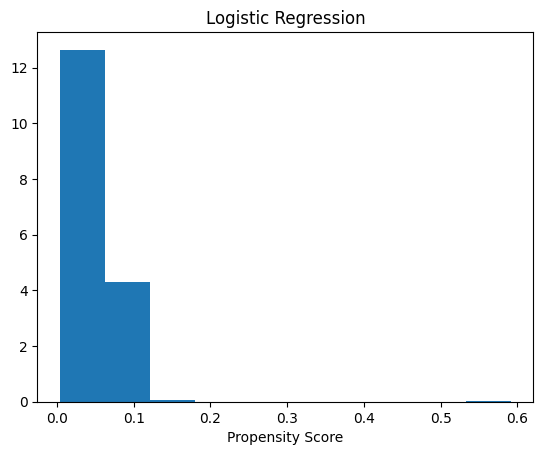

In [190]:
g = treatment_k_fold_fit_and_predict(make_g_model, X=confounders, A=treatment, n_splits=10)
plt.figure()
plt.hist(g, density=True)
plt.title("Logistic Regression")
plt.xlabel("Propensity Score")

In [61]:
Q0,Q1=outcome_k_fold_fit_and_predict(make_Q_model, X=confounders, y=outcome, A=treatment, n_splits=10, output_type="continuous")

In [62]:
data_and_nuisance_estimates = pd.DataFrame({'g': g, 'Q0': Q0, 'Q1': Q1, 'A': treatment, 'Y': outcome})
data_and_nuisance_estimates.head()

,g,Q0,Q1,A,Y
0,0.011966,1.080594,1.065755,0,0.293890
1,0.009639,0.481930,0.481930,0,0.021253
2,0.019102,-0.641106,-0.602446,0,-0.577810
3,0.075641,1.173264,1.159695,0,-0.096348
4,0.008208,0.530477,0.575057,0,0.705707


In [63]:
def att_aiptw(Q0, Q1, g, A, Y, prob_t=None):
  """
  # Double ML estimator for the ATT
  This uses the ATT specific scores, see equation 3.9 of https://www.econstor.eu/bitstream/10419/149795/1/869216953.pdf
  """

  if prob_t is None:
    prob_t = A.mean() # estimate marginal probability of treatment

  tau_hat = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0)).mean()/ prob_t
  
  scores = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0) - tau_hat*A) / prob_t
  n = Y.shape[0] # number of observations
  std_hat = np.std(scores) / np.sqrt(n)

  return tau_hat, std_hat


In [64]:
tau_hat, std_hat = att_aiptw(**data_and_nuisance_estimates)
print(f"The estimate is {tau_hat} pm {1.96*std_hat}")

The estimate is -0.25126045289509563 pm 0.3854381192130758


In [65]:
print("(", tau_hat-1.96*std_hat,",", tau_hat+1.96*std_hat, ")")

( -0.6366985721081715 , 0.13417766631798017 )


### for comparison, the point estimate without any covariate correction
outcome[treatment==1].mean()-outcome[treatment==0].mean()

# 2007

In [160]:
panel = pd.read_csv('2007_notadd_new.csv')
print(panel)

       stkcd  year  province_code  city_code indcd   fixed_asset  staff  \
0          2  2000         440000   440300.0   K70  3.382824e+08   6616   
1          2  2001         440000   440300.0   K70  2.883114e+08   5349   
2          2  2002         440000   440300.0   K70  3.486585e+08   6055   
3          2  2003         440000   440300.0   K70  2.680249e+08   7025   
4          2  2004         440000   440300.0   K70  2.314256e+08   9627   
...      ...   ...            ...        ...   ...           ...    ...   
9872  900956  2007         420000   420200.0   C38  3.134387e+08   2851   
9873  900956  2008         420000   420200.0   C38  5.662104e+08   2194   
9874  900957  2006         310000   310000.0   E50  2.040832e+08    104   
9875  900957  2007         310000   310000.0   E50  1.946251e+08    453   
9876  900957  2008         310000   310000.0   E50  1.791904e+08    447   

      tfp_acf01  lninvesta   lntasset  ...  tapr_win   roa_win  leverage  age  \
0     10.454041  1

In [170]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [171]:
panel['tp_2007'] = panel['treat_2007'] * panel['post_2007']
# make post_2004 type bool
panel['post_2007'] = panel['post_2007'].astype(bool)

In [172]:
panel = panel.groupby(['stkcd', 'post_2007']).mean()
panel = panel.reset_index(level='post_2007')
panel = panel[panel.index.duplicated(keep = False)]
panel

,post_2007,year,province_code,city_code,fixed_asset,staff,tfp_acf01,lninvesta,lntasset,lntdebt,tapr_win,roa_win,leverage,age,lnclr,unempro,unemployee,second_pro,treat_2007,tp_2007
stkcd,,,,,,,,,,,,,,,,,,,,
2,False,2003.0,440000.0,440300.0,3.140608e+08,8433.571429,10.982377,17.747345,23.262497,22.691979,0.075574,0.055402,0.567984,15.0,10.538263,1.467143,22882.142857,55.434285,0.0,0.0
2,True,2007.5,440000.0,440300.0,9.202692e+08,16489.500000,11.947134,19.277771,25.416877,25.013036,0.064683,0.046019,0.667783,19.5,10.853962,1.230000,27070.500000,49.470001,0.0,0.0
6,False,2003.0,440000.0,440300.0,1.796113e+08,101.142857,12.212527,18.108942,22.016362,21.588734,0.024496,0.019254,0.655864,14.0,14.340697,1.467143,22882.142857,55.434285,0.0,0.0
6,True,2007.5,440000.0,440300.0,3.009418e+07,175.000000,11.961030,16.062456,22.471113,22.109813,0.039981,0.035347,0.697047,18.5,12.052963,1.230000,27070.500000,49.470001,0.0,0.0
7,False,2003.0,440000.0,440300.0,3.701775e+08,671.285714,8.773469,16.421346,20.719519,20.559153,-0.058042,-0.059039,0.854661,15.0,13.208714,1.467143,22882.142857,55.434285,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900953,True,2007.5,310000.0,310000.0,8.272239e+08,10191.000000,9.873762,18.383761,21.580986,21.263036,-0.021883,-0.031474,0.727756,9.5,11.304299,1.925000,266900.000000,46.055000,0.0,0.0
900956,False,2006.0,420000.0,420200.0,2.770235e+08,2951.000000,9.765424,18.477367,21.086164,20.706963,0.011384,0.009073,0.684408,7.0,11.449724,1.370000,34852.000000,53.000000,1.0,0.0
900956,True,2007.5,420000.0,420200.0,4.398245e+08,2522.500000,10.258247,19.010901,21.356769,21.007145,0.045236,0.036885,0.704974,8.5,12.034349,1.360000,34811.500000,53.255001,1.0,1.0


In [173]:
# format this in a manner sympatico with ATT estimation
# compact_df contains only post_2004 data
compact_df = panel[panel['post_2007']]

# calcuate change in TFP
lninvest = panel['lninvesta'].values
compact_df['Y1-Y0'] = lninvest[panel['post_2007']] - lninvest[~panel['post_2007']]

# reset index so we have (1,2,3..)
compact_df = compact_df.reset_index()

# set outcome to Y1-Y0
outcome = compact_df['Y1-Y0']
treatment = compact_df['treat_2007'].astype(int)
confounders = compact_df[['lntasset', 'lntdebt', 'roa_win','age', 'unempro', 'second_pro']]
#compact_df.to_csv("compact.csv")

/var/folders/jr/pbg7pbbx5xdc686t3j5c4rkw0000gn/T/ipykernel_8130/3041782888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_df['Y1-Y0'] = lninvest[panel['post_2007']] - lninvest[~panel['post_2007']]


In [174]:
# specify a model for the conditional expected outcome

# TODO(victorveitch) the covariates have basically no predictive power, replace this example with something better

# make a function that returns a sklearn model for later use in k-folding
def make_Q_model():
   #return LinearRegression() # first model
   #return GradientBoostingRegressor(random_state=RANDOM_SEED, n_estimators=300, max_depth=3) # second model 
   #return RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100, max_depth=3) # third model
   return RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100, max_depth=5) #acceptable
   # return XGBRegressor(random_state=RANDOM_SEED, n_estimators=200, n_jobs=1)
Q_model = make_Q_model()

# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_w_treatment = confounders.copy()
X_w_treatment["treatment"] = treatment

X_train, X_test, y_train, y_test = train_test_split(X_w_treatment, outcome, test_size=0.2)
Q_model.fit(X_train, y_train)
y_pred = Q_model.predict(X_test)

test_mse=mean_squared_error(y_pred, y_test)
print(f"Test MSE of fit model {test_mse}") 
baseline_mse=mean_squared_error(y_train.mean()*np.ones_like(y_test), y_test)
print(f"Test MSE of no-covariate model {baseline_mse}")

Test MSE of fit model 1.6681059805481935
Test MSE of no-covariate model 2.398295711024184


In [175]:
# specify a model for the propensity score

def make_g_model():
 
 #return LogisticRegression(max_iter=1000) # first model
 #return GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state = RANDOM_SEED) # second model
 #return RandomForestClassifier(n_estimators=100, max_depth=3) # third model 
 return RandomForestClassifier(n_estimators=100, max_depth=5) # fourth model

 # return XGBClassifier(n_estimators=100, n_jobs=1, nthread=None, random_state= RANDOM_SEED) #unacceptable 

g_model = make_g_model()
# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_train, X_test, a_train, a_test = train_test_split(confounders, treatment, test_size=0.2)
g_model.fit(X_train, a_train)
a_pred = g_model.predict_proba(X_test)[:,1]

test_ce=log_loss(a_test, a_pred)
print(f"Test CE of fit model {test_ce}") 
baseline_ce=log_loss(a_test, a_train.mean()*np.ones_like(a_test))
print(f"Test CE of no-covariate model {baseline_ce}")

Test CE of fit model 0.2558908425682924
Test CE of no-covariate model 0.34589133900921565


In [176]:
# Model fit 
X_w_treatment = confounders.copy()
X_w_treatment["treatment"] = treatment

Q_mses = []
mse_baselines = []
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
for train_index, test_index in kf.split(X_w_treatment, outcome):
    X_train, X_test = X_w_treatment.loc[train_index], X_w_treatment.loc[test_index]
    y_train, y_test = outcome.loc[train_index], outcome.loc[test_index]
    #Q_model = Q_model_class(**Q_model_params)
    Q_model.fit(X_train, y_train)
    y_pred = Q_model.predict(X_test)
    Q_mse = mean_squared_error(y_test, y_pred)
    baseline_mse = mean_squared_error(y_train.mean()*np.ones_like(y_test), y_test)
    Q_mses.append(Q_mse)
    mse_baselines.append(baseline_mse)

X = confounders.copy()
g_ces = []
ce_baselines = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
for train_index, test_index in kf.split(X, treatment):
    X_train, X_test= X.loc[train_index], X.loc[test_index]
    a_train, a_test = treatment.loc[train_index], treatment.loc[test_index]
    #g_model = g_model_class(**g_model_params)
    g_model.fit(X_train, a_train)
    a_pred = g_model.predict_proba(X_test)[:,1]
    g_ce = log_loss(a_test, a_pred)
    baseline_ce = log_loss(a_test, a_train.mean()*np.ones_like(a_test))
    g_ces.append(g_ce)
    ce_baselines.append(baseline_ce)

df = pd.DataFrame({'Q mse': Q_mses, 'Q baseline': mse_baselines, 'g ce': g_ces, 'g baselines': ce_baselines})
df2 = df.mean(axis=0)
df2

Q mse          2.428246
Q baseline     3.008976
g ce           0.220827
g baselines    0.291447
dtype: float64

In [177]:
def treatment_k_fold_fit_and_predict(make_model, X:pd.DataFrame, A:np.array, n_splits:int):
    """
    Implements K fold cross-fitting for the model predicting the treatment A. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns an array containing the predictions  

    Args:
    model: function that returns sklearn model (which implements fit and predict_prob)
    X: dataframe of variables to adjust for
    A: array of treatments
    n_splits: number of splits to use
    """
    predictions = np.full_like(A, np.nan, dtype=float)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    
    for train_index, test_index in kf.split(X, A):
      X_train = X.loc[train_index]
      A_train = A.loc[train_index]
      g = make_model()
      g.fit(X_train, A_train)

      # get predictions for split
      predictions[test_index] = g.predict_proba(X.loc[test_index])[:, 1]

    assert np.isnan(predictions).sum() == 0
    return predictions


def outcome_k_fold_fit_and_predict(make_model, X:pd.DataFrame, y:np.array, A:np.array, n_splits:int, output_type:str):
    """
    Implements K fold cross-fitting for the model predicting the outcome Y. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns two arrays containing the predictions for all units untreated, all units treated  

    Args:
    model: function that returns sklearn model (that implements fit and either predict_prob or predict)
    X: dataframe of variables to adjust for
    y: array of outcomes
    A: array of treatments
    n_splits: number of splits to use
    output_type: type of outcome, "binary" or "continuous"

    """
    predictions0 = np.full_like(A, np.nan, dtype=float)
    predictions1 = np.full_like(y, np.nan, dtype=float)
    if output_type == 'binary':
      kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    elif output_type == 'continuous':
      kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    # include the treatment as input feature
    X_w_treatment = X.copy()
    X_w_treatment["A"] = A

    # for predicting effect under treatment / control status for each data point 
    X0 = X_w_treatment.copy()
    X0["A"] = 0
    X1 = X_w_treatment.copy()
    X1["A"] = 1

    
    for train_index, test_index in kf.split(X_w_treatment, y):
      X_train = X_w_treatment.loc[train_index]
      y_train = y.loc[train_index]
      q = make_model()
      q.fit(X_train, y_train)

      if output_type =='binary':
        predictions0[test_index] = q.predict_proba(X0.loc[test_index])[:, 1]
        predictions1[test_index] = q.predict_proba(X1.loc[test_index])[:, 1]
      elif output_type == 'continuous':
        predictions0[test_index] = q.predict(X0.loc[test_index])
        predictions1[test_index] = q.predict(X1.loc[test_index])

    assert np.isnan(predictions0).sum() == 0
    assert np.isnan(predictions1).sum() == 0
    return predictions0, predictions1

Text(0.5, 0, 'Propensity Score')

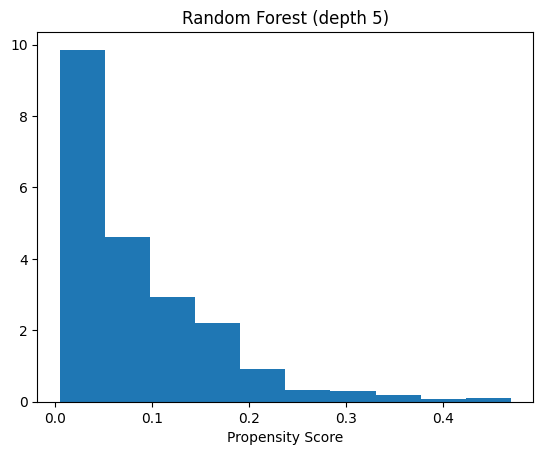

In [178]:
g = treatment_k_fold_fit_and_predict(make_g_model, X=confounders, A=treatment, n_splits=10)
plt.figure()
plt.hist(g, density=True)
plt.title("Random Forest (depth 5)")
plt.xlabel("Propensity Score")

In [105]:
Q0,Q1=outcome_k_fold_fit_and_predict(make_Q_model, X=confounders, y=outcome, A=treatment, n_splits=10, output_type="continuous")

In [106]:
data_and_nuisance_estimates = pd.DataFrame({'g': g, 'Q0': Q0, 'Q1': Q1, 'A': treatment, 'Y': outcome})
data_and_nuisance_estimates.head()

,g,Q0,Q1,A,Y
0,0.243715,0.933795,0.963456,0,1.530426
1,0.047100,0.949235,0.957190,0,-2.046486
2,0.046245,-0.467394,-0.467394,0,-0.940513
3,0.031240,-4.211562,-4.211562,0,0.521937
4,0.054108,0.941816,0.948853,0,0.745998


In [107]:
def att_aiptw(Q0, Q1, g, A, Y, prob_t=None):
  """
  # Double ML estimator for the ATT
  This uses the ATT specific scores, see equation 3.9 of https://www.econstor.eu/bitstream/10419/149795/1/869216953.pdf
  """

  if prob_t is None:
    prob_t = A.mean() # estimate marginal probability of treatment

  tau_hat = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0)).mean()/ prob_t
  
  scores = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0) - tau_hat*A) / prob_t
  n = Y.shape[0] # number of observations
  std_hat = np.std(scores) / np.sqrt(n)

  return tau_hat, std_hat


In [108]:
tau_hat, std_hat = att_aiptw(**data_and_nuisance_estimates)
print(f"The estimate is {tau_hat} pm {1.96*std_hat}")

The estimate is 0.3320429405874762 pm 0.2369106597530061


In [109]:
print("(", tau_hat-1.96*std_hat,",", tau_hat+1.96*std_hat, ")")

( 0.09513228083447009 , 0.5689536003404823 )
